In [1]:
# pip install -r requirements.txt

Вначале импортируем основные библиотеки для работы с данными

In [2]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

# Настройка палитры seaborn для задания стиля графиков
sns.set_palette('cubehelix')

Дата сет представляет собой файл формата csv, сжатым в архив формата zip.

In [3]:
df = pd.read_csv("data_despair_139_v20241014.zip", compression="zip", sep=";")  # Прямо из zip

Для первичного анализа датасета отобразим несколько строк

In [35]:
display(df.sample(6)) # показываем первые 6 строк
pd.set_option('display.max_columns', None) # для показа всех колонок

,indicator_name,object_level,object_name,okato,oktmo,year,age,settlement_type,gender,reason_code,reason_name,indicator_value,indicator_unit
652719,Число умерших,Регион,Камчатский край,30000000,30000000,2022,25-29 лет,T,F,293,"Воздействие дымом, огнем и пламенем с неопреде...",0,Человек
759549,Число умерших,Регион,Курская область,38000000,38000000,2022,85 и более лет,T,F,295,"Падение, прыжок или сталкивание с высоты с нео...",0,Человек
489114,Число умерших,Регион,Кемеровская область,32000000,32000000,2021,40-44 лет,R,F,296,Авария моторного транспортного средства с неоп...,0,Человек
315287,Число умерших,Регион,Свердловская область,65000000,65000000,2020,50-54 лет,R,M,294,Контакт с острым и тупым предметом с неопредел...,5,Человек
440472,Число умерших,Федеральный округ,Сибирский федеральный округ,0,0,2021,15-19 лет,T,M,291,Погружение в воду и утопление с неопределенным...,5,Человек
7780,Число умерших,Регион,Республика Алтай,84000000,84000000,2019,до 1 года,U,M,284,Другие преднамеренные самоповреждения (включая...,0,Человек


In [5]:
df.shape # из чего состоит дф

(968720, 13)

Для дальнейшего анализа датасета уменьшим количество строк и уберем некоторые параметры. Исследует атрибуты `age`, `object_level`, `settlement_type`.

Отфильтрованный дата сет поместим в новую переменную `df_filtered`.

In [6]:
df_filtered = df

В возрасте есть категория "Всего". Для анализа мы не будем учитывать это значение. Кроме того, было принято решение взять следующую исследуемую группу: возраст от 10 до 84 лет включительно.

In [7]:
df["age"].value_counts()

age
до 1 года          48436
1-4 года           48436
85 и  более лет    48436
80-84 лет          48436
75-79 лет          48436
70-74 лет          48436
65-69 лет          48436
60-64 лет          48436
55-59 лет          48436
50-54 лет          48436
45-49 лет          48436
40-44 лет          48436
35-39 лет          48436
30-34 лет          48436
25-29 лет          48436
20-24 года         48436
15-19 лет          48436
10-14 лет          48436
5-9 лет            48436
Всего              48436
Name: count, dtype: int64

In [8]:
df_filtered = df_filtered[~df_filtered["age"].isin(['до 1 года', '1-4 года', '5-9 лет', '85 и  более лет', 'Всего'])]

Посмотрим атрибут `object_level`. Атрибут содержит три категории: регион, федеральный округ и страна. Дальшейнее анализ будет проводиться по наиболее маленькому уровню объектов, то есть только по регионам.

In [9]:
df["object_level"].value_counts()

object_level
Регион               875840
Федеральный округ     82560
Страна                10320
Name: count, dtype: int64

In [10]:
df_filtered = df_filtered[df_filtered["object_level"] == "Регион"]

Атрибут `settlement_type`. Атрибут содержит три категории: U (городская местность), R (сельская местность) и T (общее). В дальнейшем анализе не будем брать во внимание категорию T.

In [11]:
df["settlement_type"].value_counts()

settlement_type
U    323360
T    323360
R    322000
Name: count, dtype: int64

In [12]:
df_filtered = df_filtered[df_filtered["settlement_type"] != "T"]

In [13]:
df_filtered.shape

(437580, 13)

Еще раз кратко отфильтруем датасет

In [14]:
df_filtered = df[
    (~df["age"].isin(["до 1 года", "1-4 года", "5-9 лет", "85 и  более лет", "Всего"])) &
    (df["object_level"] == "Регион") &
    (df["settlement_type"] != "T")  
]

In [15]:
df_filtered.shape

(437580, 13)

Выведем несколько случайных строк из отфильтрованного датасета

In [50]:
display(df_filtered.sample(5)) 
pd.set_option('display.max_columns', None) # для показа всех колонок

,object_name,year,age,settlement_type,gender,reason_code,reason_name,indicator_value
757966,Хабаровский край,2022,80-84 лет,R,M,293,"Воздействие дымом, огнем и пламенем с неопреде...",0
637067,Ленинградская область,2022,20-24 года,U,F,279,Случайное отравление (воздействие) алкоголем,0
325198,Ямало-Ненецкий автономный округ,2020,55-59 лет,R,F,294,Контакт с острым и тупым предметом с неопредел...,1
238042,Самарская область,2020,10-14 лет,U,M,297,Уточненные и неуточненные повреждения с неопре...,0
831731,Саратовская область,2023,20-24 года,U,F,295,"Падение, прыжок или сталкивание с высоты с нео...",1


Для дальнейшего анализа в проекте не понадобятся столбцы `indicator_name`, `object_level`, `okato`, `oktmo`, `indicator_unit`.

In [17]:
del df_filtered['okato']
del df_filtered['oktmo']
del df_filtered['indicator_name']
del df_filtered['indicator_unit']
del df_filtered['object_level']

In [18]:
display(df_filtered.sample(5)) 
pd.set_option('display.max_columns', None) # для показа всех колонок

,object_name,year,age,settlement_type,gender,reason_code,reason_name,indicator_value
291169,Ярославская область,2020,40-44 лет,U,M,280,Случайное отравление и воздействие медикаментами,0
119565,Республика Тыва,2019,50-54 лет,U,M,290,"Повешение, удушение и удавление с неопределенн...",0
831535,Пензенская область,2023,20-24 года,R,M,286,Отравление и воздействие медикаментами с неопр...,0
944353,Республика Дагестан,2023,80-84 лет,R,M,292,Повреждение в результате выстрела из огнестрел...,0
543045,Республика Ингушетия,2021,70-74 лет,R,M,286,Отравление и воздействие медикаментами с неопр...,0


После удаления некоторых столбцов в отфильтрованной таблице остались следующие атрибуты:

|Атрибут|Описание|
|-|-|
|`object_name`|наименование региона|
|`year`|год|
|`age`|возрастная категория|
|`settlement_type`|тип местности (R - сельская, U - городская)|
|`gender`|пол|
|`reason_code`|краткая номенклатура причины смерти|
|`reason_name`|причина смерти|
|`indicator_value`|количество смертей|

In [19]:
# Перед построением всех графиков установим палитру цветов pastel

sns.set_palette('pastel')

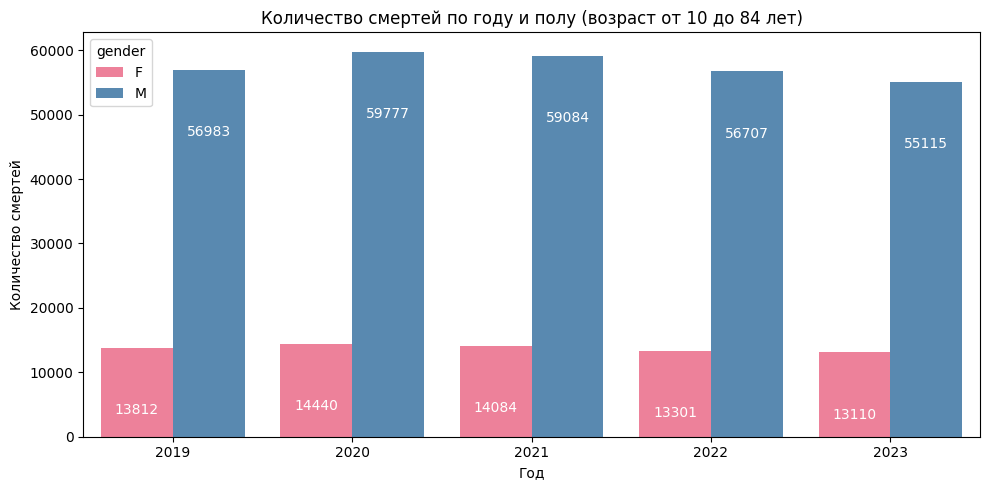

In [20]:
# Группируем данные по возрасту и полу
result_1 = df_filtered.groupby(['year', 'gender'])['indicator_value'].sum().reset_index()

plt.figure(figsize=(10, 5))
custom_colors = {'M': '#4B8BBE', 'F': '#FF6F91'} # словарь цветов для графика
ax = sns.barplot(x='year', y='indicator_value', hue='gender', data=result_1, palette=custom_colors)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=-50, color='white')
    
plt.xlabel('Год')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)')
plt.xticks()
plt.tight_layout()
plt.show()

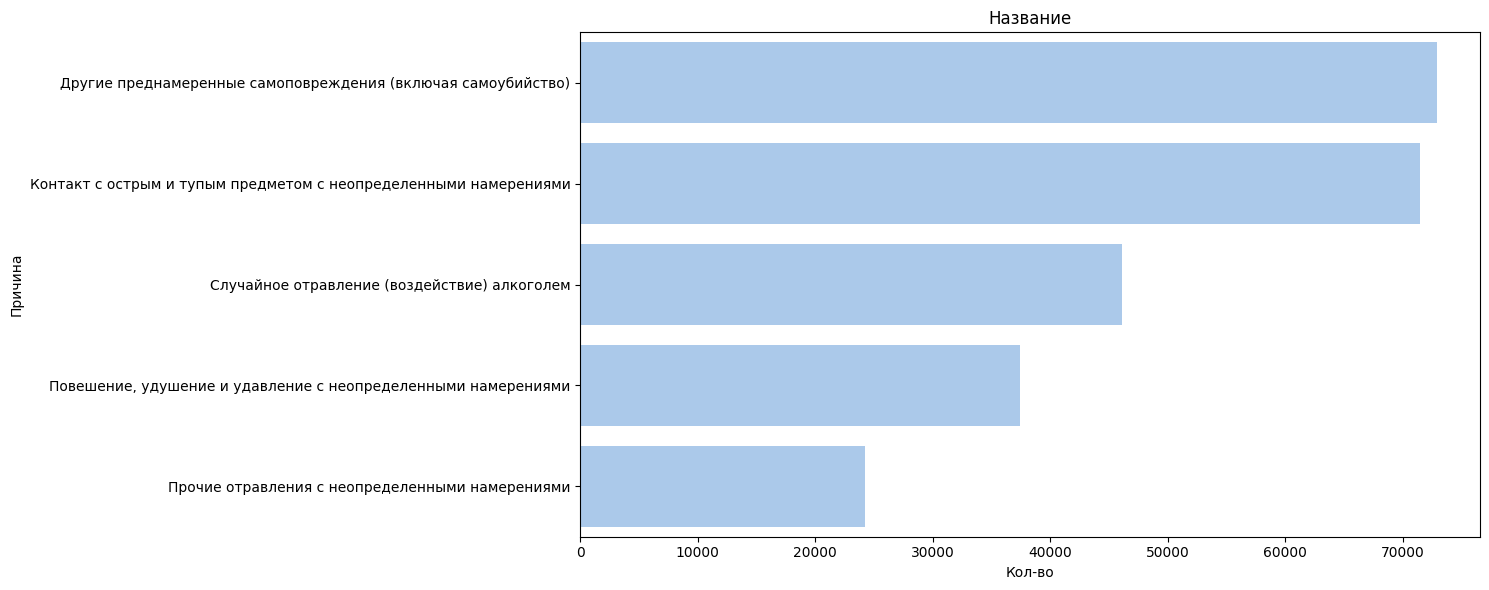

In [88]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index().sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(15, 6))

ax = sns.barplot(x='indicator_value', y='reason_name', data=result_2, orient='h')
    
plt.xlabel('Кол-во')
plt.ylabel('Причина')
plt.title('Название')
plt.xticks()
plt.tight_layout()
plt.show()

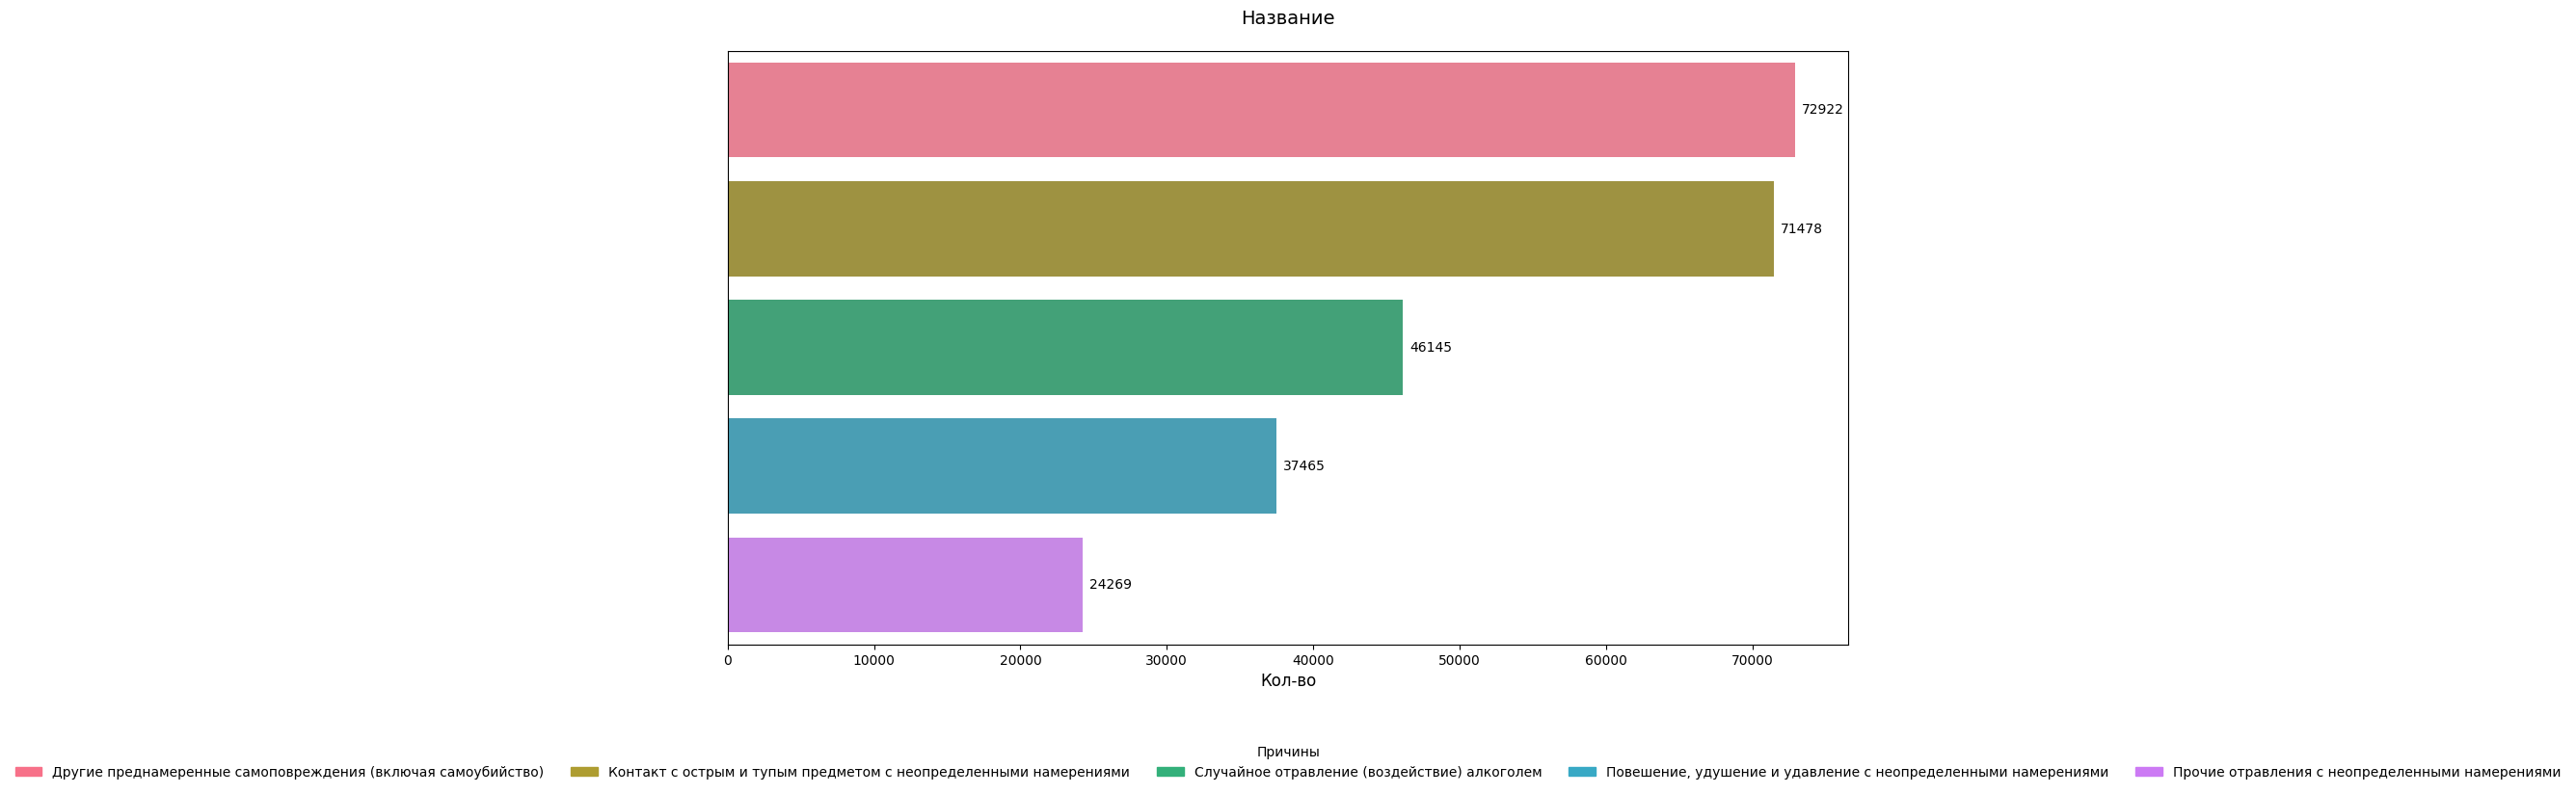

In [84]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(15, 8))  # Увеличил высоту для лучшего отображения

# Создаем палитру с разными цветами для каждого столбца
custom_palette = sns.color_palette("husl", len(result_2))

# Строим график с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='reason_name', 
                 data=result_2, palette=custom_palette, orient='h')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Кол-во', fontsize=12)
plt.ylabel('')  # Убираем label с оси Y, так как причины будут в легенде
plt.title('Название', fontsize=14, pad=20)

# Переносим наименования причин в легенду под графиком
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
plt.legend(handles=handles, 
           labels=result_2['reason_name'].tolist(), 
           title='Причины',
           bbox_to_anchor=(0.5, -0.15), 
           loc='upper center',
           ncol=len(result_2),
           frameon=False)

plt.yticks([])  # Убираем метки на оси Y, так как используем легенду
plt.tight_layout()
plt.show()

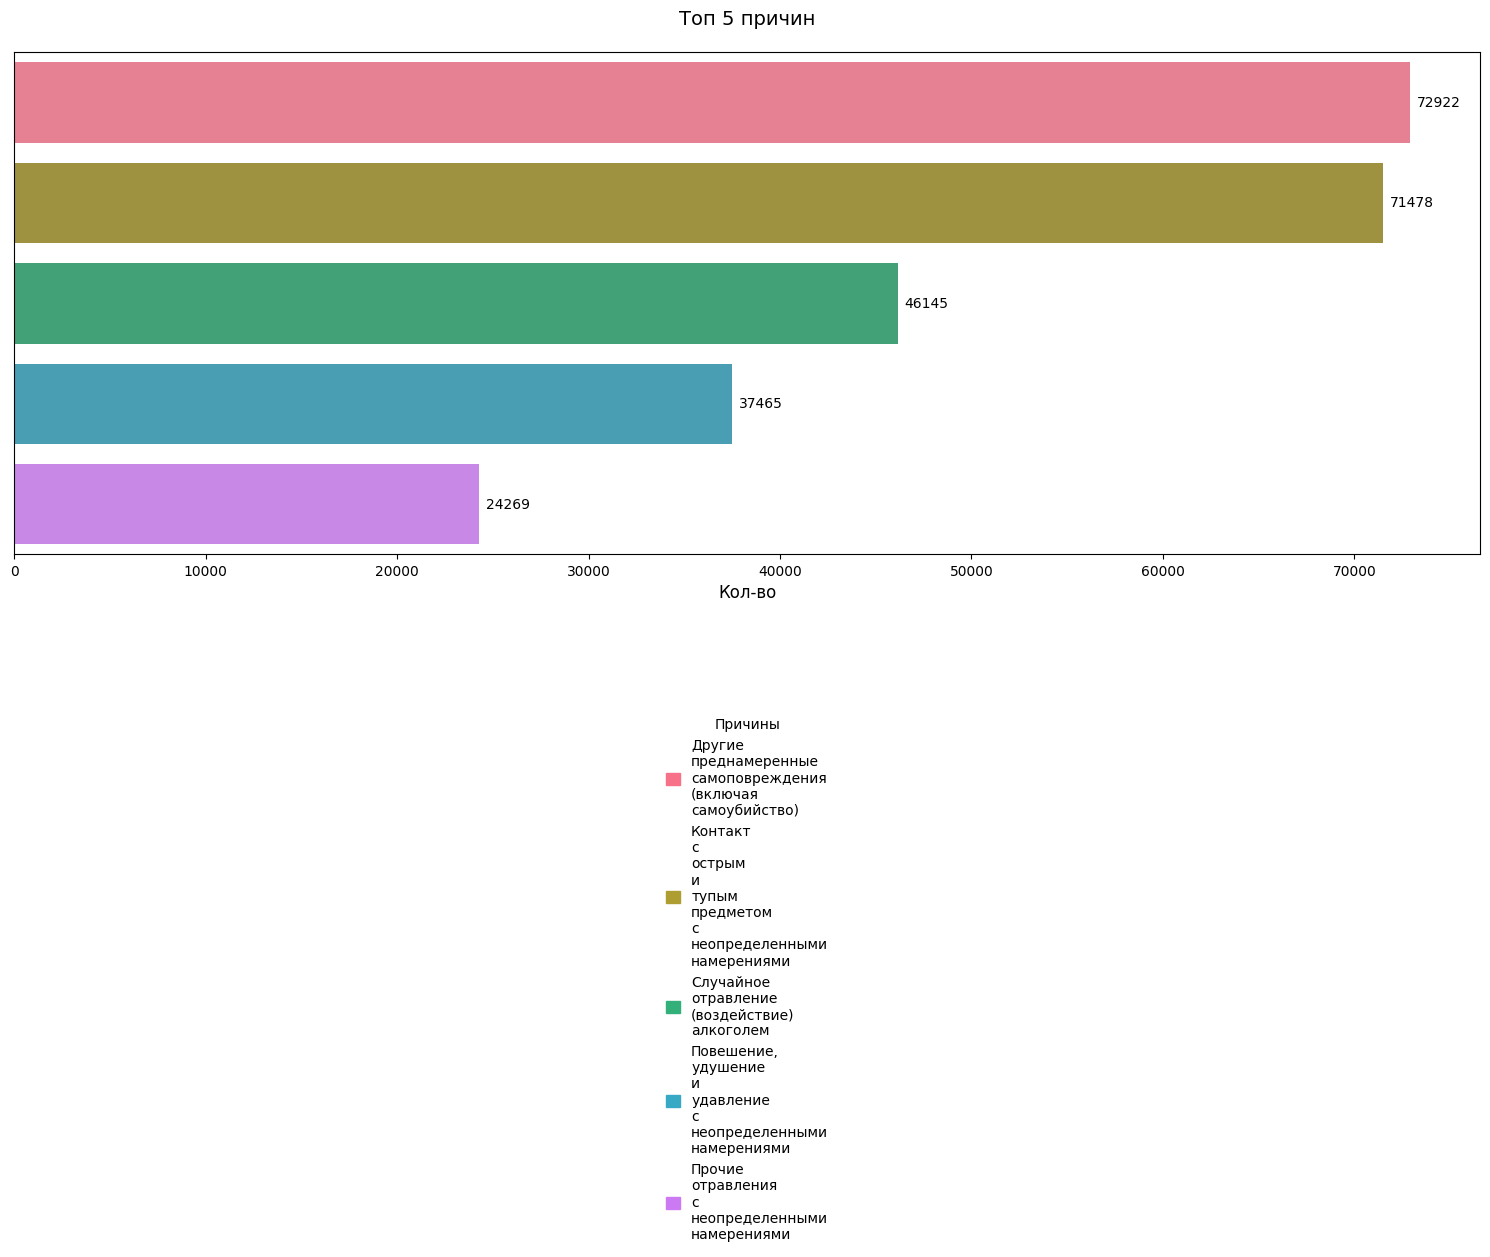

In [89]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(15, 8))  # Увеличиваем высоту для лучшего отображения

# Создаем палитру с разными цветами для каждого столбца
custom_palette = sns.color_palette("husl", len(result_2))

# Строим график с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='reason_name', 
                 data=result_2, palette=custom_palette, orient='h')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Кол-во', fontsize=12)
plt.ylabel('')  # Убираем label с оси Y
plt.title('Топ 5 причин', fontsize=14, pad=20)

# Создаем легенду с переносами строк
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
legend_labels = [label.replace(' ', '\n') for label in result_2['reason_name'].tolist()]

plt.legend(handles=handles, 
           labels=legend_labels,
           title='Причины',
           bbox_to_anchor=(0.5, -0.3),  # Смещаем ниже
           loc='upper center',
           ncol=1,  # Один столбец в легенде - каждая причина с новой строки
           frameon=False,
           handlelength=1,
           handleheight=1,
           fontsize=10)

plt.yticks([])  # Убираем метки на оси Y
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Добавляем место снизу для легенды
plt.show()

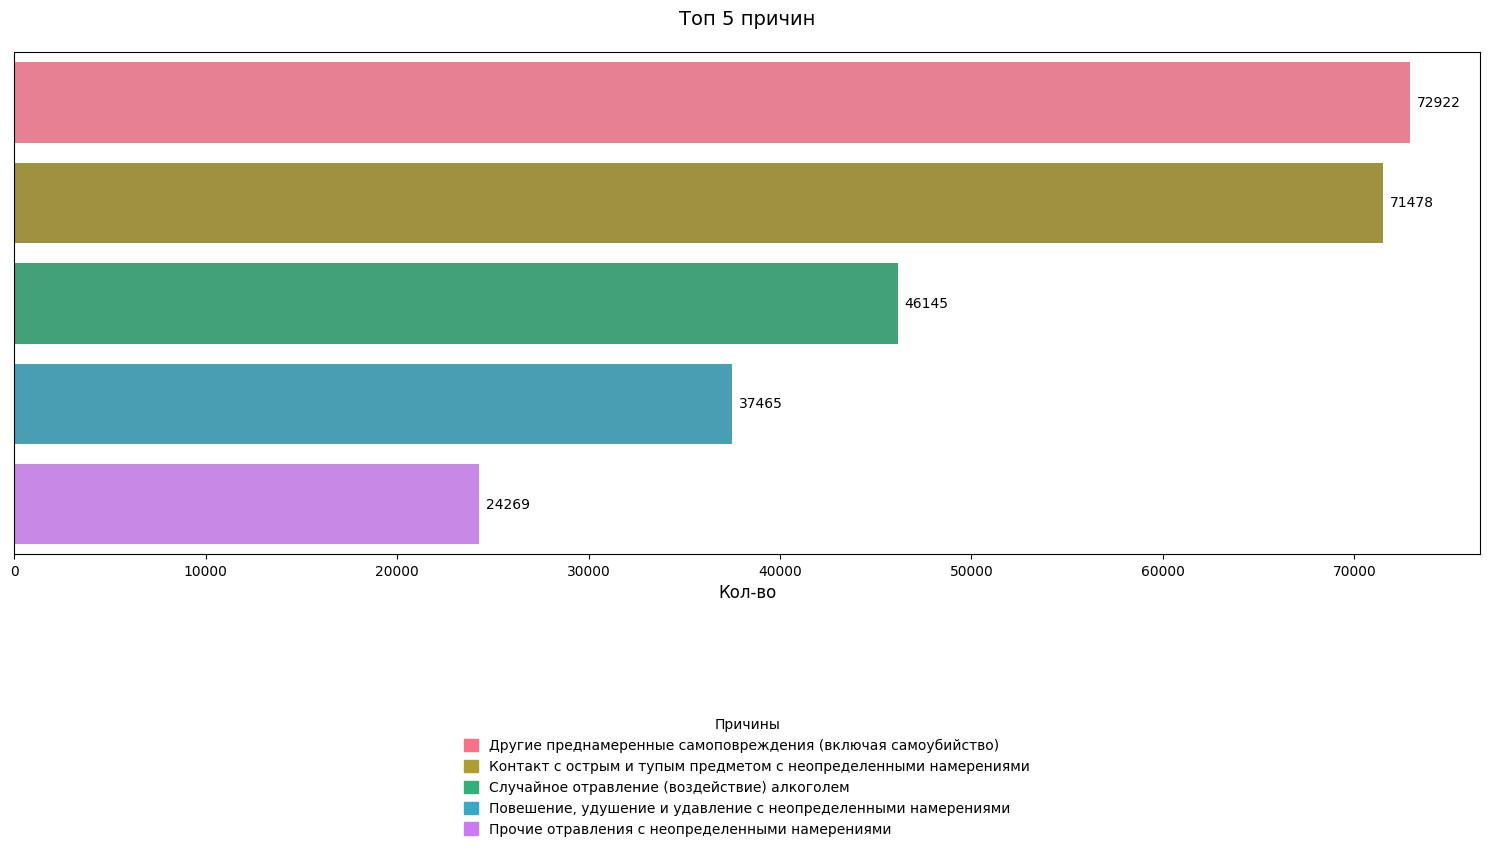

In [90]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(15, 8))  # Увеличиваем высоту для лучшего отображения

# Создаем палитру с разными цветами для каждого столбца
custom_palette = sns.color_palette("husl", len(result_2))

# Строим график с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='reason_name', 
                 data=result_2, palette=custom_palette, orient='h')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Кол-во', fontsize=12)
plt.ylabel('')  # Убираем label с оси Y
plt.title('Топ 5 причин', fontsize=14, pad=20)

# Создаем легенду - каждая причина с новой строки
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
legend_labels = result_2['reason_name'].tolist()  # Берем полные названия

plt.legend(handles=handles, 
           labels=legend_labels,
           title='Причины',
           bbox_to_anchor=(0.5, -0.3),  # Смещаем ниже
           loc='upper center',
           ncol=1,  # Один столбец - каждая причина с новой строки
           frameon=False,
           handlelength=1,
           handleheight=1,
           fontsize=10)

plt.yticks([])  # Убираем метки на оси Y
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Добавляем место снизу для легенды
plt.show()

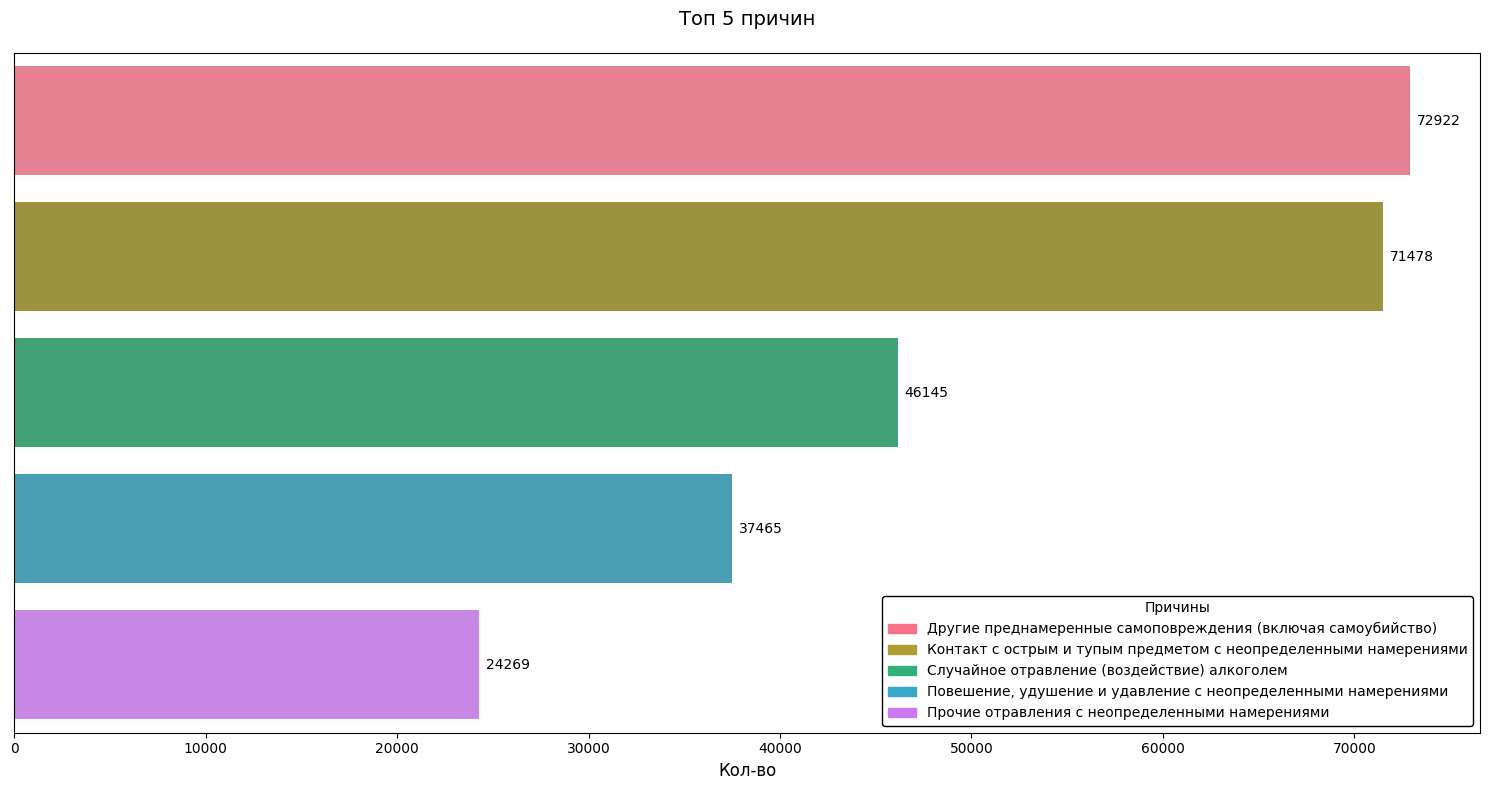

In [91]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(15, 8))

# Создаем палитру с разными цветами для каждого столбца
custom_palette = sns.color_palette("husl", len(result_2))

# Строим график с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='reason_name', 
                 data=result_2, palette=custom_palette, orient='h')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Кол-во', fontsize=12)
plt.ylabel('')  # Убираем label с оси Y
plt.title('Топ 5 причин', fontsize=14, pad=20)

# Создаем легенду внутри графика
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
legend_labels = result_2['reason_name'].tolist()

# Добавляем легенду в правый нижний угол с рамкой
legend = ax.legend(handles, legend_labels,
                 title='Причины',
                 loc='lower right',
                 frameon=True,  # Включаем рамку
                 framealpha=1,  # Непрозрачная рамка
                 edgecolor='black',  # Цвет обводки
                 fancybox=True,  # Скругленные углы
                 ncol=1,  # Одна колонка - каждая причина с новой строки
                 bbox_to_anchor=(1.0, 0.0))  # Правый нижний угол

plt.yticks([])  # Убираем метки на оси Y
plt.tight_layout()
plt.show()

In [21]:
df.info() # выводит всю информацию по дф (кол-во ненулевых значений и тип данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968720 entries, 0 to 968719
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   indicator_name   968720 non-null  object
 1   object_level     968720 non-null  object
 2   object_name      968720 non-null  object
 3   okato            968720 non-null  int64 
 4   oktmo            968720 non-null  int64 
 5   year             968720 non-null  int64 
 6   age              968720 non-null  object
 7   settlement_type  968720 non-null  object
 8   gender           968720 non-null  object
 9   reason_code      968720 non-null  int64 
 10  reason_name      968720 non-null  object
 11  indicator_value  968720 non-null  int64 
 12  indicator_unit   968720 non-null  object
dtypes: int64(5), object(8)
memory usage: 96.1+ MB


In [22]:
df["indicator_value"].value_counts() # считаем кол-во каждого из значений в статусе

indicator_value
0       714644
1        88831
2        38443
3        22505
4        15129
         ...  
2146         1
2418         1
1520         1
656          1
984          1
Name: count, Length: 1208, dtype: int64

In [51]:
df_filtered.groupby('reason_name')['indicator_value'].sum().sort_values(ascending=False)


reason_name
Другие преднамеренные самоповреждения (включая самоубийство)                                                                                         72922
Контакт с острым и тупым предметом с неопределенными намерениями                                                                                     71478
Случайное отравление (воздействие) алкоголем                                                                                                         46145
Повешение, удушение и удавление с неопределенными намерениями                                                                                        37465
Прочие отравления с неопределенными намерениями                                                                                                      24269
Случайное отравление и воздействие наркотиками и психодислептиками (галлюциногенами)                                                                 22005
Отравление и воздействие алкоголем с неопределенными намер

In [52]:
df_filtered.groupby('gender')['indicator_value'].sum()


gender
F     68747
M    287666
Name: indicator_value, dtype: int64

In [54]:
df_filtered.groupby('age')['indicator_value'].sum()

age
10-14 лет      1946
15-19 лет      6937
20-24 года    11111
25-29 лет     17664
30-34 лет     34653
35-39 лет     44879
40-44 лет     44702
45-49 лет     37677
50-54 лет     30737
55-59 лет     32066
60-64 лет     31650
65-69 лет     23848
70-74 лет     16756
75-79 лет      9223
80-84 лет     12564
Name: indicator_value, dtype: int64

In [55]:
df_filtered[(df_filtered['year'] == 2022) & df_filtered['indicator_value']  > 0]

,object_name,year,age,settlement_type,gender,reason_code,reason_name,indicator_value
615435,Белгородская область,2022,10-14 лет,U,M,290,"Повешение, удушение и удавление с неопределенн...",1
615447,Белгородская область,2022,10-14 лет,U,F,284,Другие преднамеренные самоповреждения (включая...,1
615486,Белгородская область,2022,10-14 лет,R,F,290,"Повешение, удушение и удавление с неопределенн...",1
615550,Брянская область,2022,10-14 лет,U,F,286,Отравление и воздействие медикаментами с неопр...,1
615732,Воронежская область,2022,10-14 лет,U,M,279,Случайное отравление (воздействие) алкоголем,1
...,...,...,...,...,...,...,...,...
758273,Сахалинская область,2022,80-84 лет,R,M,294,Контакт с острым и тупым предметом с неопредел...,1
758285,Сахалинская область,2022,80-84 лет,R,F,289,Прочие отравления с неопределенными намерениями,1
758290,Сахалинская область,2022,80-84 лет,R,F,294,Контакт с острым и тупым предметом с неопредел...,1
758332,Еврейская автономная область,2022,80-84 лет,U,M,284,Другие преднамеренные самоповреждения (включая...,1


In [56]:
df_filtered.groupby('year')['indicator_value'].sum()

year
2019    70795
2020    74217
2021    73168
2022    70008
2023    68225
Name: indicator_value, dtype: int64

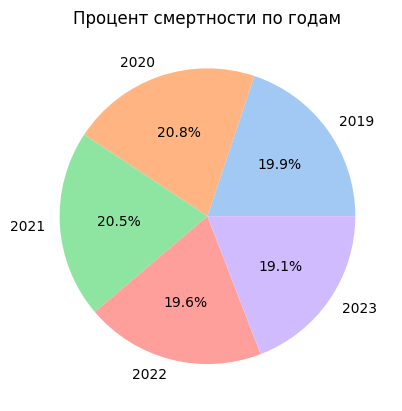

In [62]:
sns.set_palette('pastel')
year_death = df_filtered.groupby('year')['indicator_value'].sum()
plt.pie(year_death, labels=year_death.index, autopct='%1.1f%%')
plt.title('Процент смертности по годам')
plt.show()

In [63]:
# Группировка по году и полу и подсчет суммы смертей
result = df_filtered.groupby(['year', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,year,gender,indicator_value
0,2019,F,13812
1,2019,M,56983
2,2020,F,14440
3,2020,M,59777
4,2021,F,14084
5,2021,M,59084
6,2022,F,13301
7,2022,M,56707
8,2023,F,13110
9,2023,M,55115


In [64]:
# Группировка по возрасту и полу и подсчет суммы смертей
result = df_filtered.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,age,gender,indicator_value
0,10-14 лет,F,815
1,10-14 лет,M,1131
2,15-19 лет,F,1939
3,15-19 лет,M,4998
4,20-24 года,F,2042
5,20-24 года,M,9069
6,25-29 лет,F,2465
7,25-29 лет,M,15199
8,30-34 лет,F,4503
9,30-34 лет,M,30150


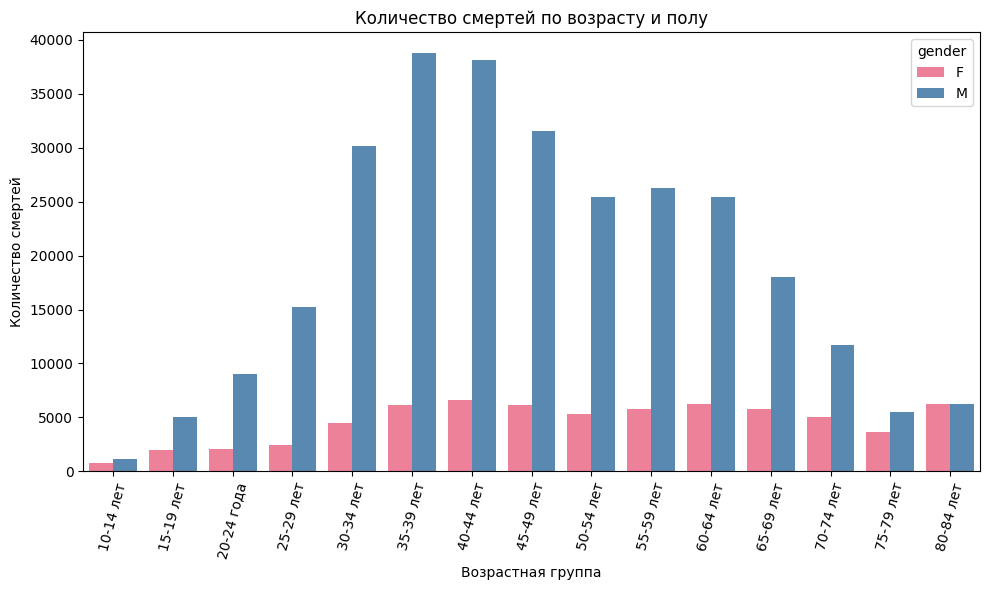

In [74]:

# Группируем данные по возрасту и полу
result = df_filtered.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Построение графика
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='indicator_value', hue='gender', data=result, palette=custom_colors)

plt.xlabel('Возрастная группа')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по возрасту и полу')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [75]:
df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index().sort_values('indicator_value', ascending=False).head(5)


,reason_name,indicator_value
2,Другие преднамеренные самоповреждения (включая...,72922
3,Контакт с острым и тупым предметом с неопредел...,71478
15,Случайное отравление (воздействие) алкоголем,46145
8,"Повешение, удушение и удавление с неопределенн...",37465
13,Прочие отравления с неопределенными намерениями,24269
